In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data/labels_brset.csv')

In [4]:
def analyze_dataframe(df, return_string=True):
    """
    Analyze a DataFrame by showing dtypes, value counts, and number of unique values for each column.
    
    Parameters:
    df (pandas.DataFrame): Input DataFrame to analyze
    
    Returns:
    pandas.DataFrame: Summary DataFrame with column analysis
    """
    # Create empty lists to store information
    columns = []
    dtypes = []
    value_counts = []
    unique_counts = []
    null_counts = []
    
    # Analyze each column
    for column in df.columns:
        columns.append(column)
        dtypes.append(str(df[column].dtype))
        value_counts.append(df[column].count())
        unique_counts.append(df[column].nunique())
        null_counts.append(df[column].isnull().sum())
    
    # Create summary DataFrame
    summary_df = pd.DataFrame({
        'Column': columns,
        'Dtype': dtypes,
        'Total Values': value_counts,
        'Unique Values': unique_counts,
        'Null Values': null_counts
    })
    
    summary_df['Unique %'] = round((summary_df['Unique Values'] / summary_df['Total Values']) * 100, 2)
    
    if return_string:
        return summary_df.set_index('Column').reset_index(drop=False).to_string(index=False)
    return summary_df

# Example usage:
summary = analyze_dataframe(df)
print(summary)

                  Column   Dtype  Total Values  Unique Values  Null Values  Unique %
                image_id  object         16266          16266            0    100.00
              patient_id   int64         16266           8524            0     52.40
                  camera  object         16266              2            0      0.01
             patient_age float64         10820             92         5446      0.85
           comorbidities  object          8029            213         8237      2.65
         diabetes_time_y  object          1910             55        14356      2.88
                insuline  object          1714              2        14552      0.12
             patient_sex   int64         16266              2            0      0.01
                exam_eye   int64         16266              2            0      0.01
                diabetes  object         16266              2            0      0.01
             nationality  object         16266              1    

In [5]:
# Group by patient_id and check for inconsistencies
def check_patient_consistency(df):
    # Get all columns except patient_id and image_id
    columns_to_check = [col for col in df.columns if col not in ['patient_id', 'image_id']]
    
    # Group by patient_id
    grouped = df.groupby('patient_id')
    
    # Store inconsistent patients
    inconsistencies = {}
    
    for patient_id, patient_data in grouped:
        # For each column, check if all values are the same for this patient
        for col in columns_to_check:
            unique_values = patient_data[col].unique()
            if len(unique_values) > 1:
                if patient_id not in inconsistencies:
                    inconsistencies[patient_id] = {}
                inconsistencies[patient_id][col] = unique_values
    
    # Print results
    if not inconsistencies:
        print("No inconsistencies found. All patients have consistent data across their records.")
    else:
        print("Found inconsistencies for the following patients:\n")
        for patient_id, columns in inconsistencies.items():
            print(f"Patient ID: {patient_id}")
            for col, values in columns.items():
                print(f"  - {col}: {values}")
            print()

# Run the consistency check
check_patient_consistency(df)

Found inconsistencies for the following patients:

Patient ID: 1
  - exam_eye: [1 2]
  - optic_disc: ['1' '2']

Patient ID: 2
  - exam_eye: [1 2]

Patient ID: 3
  - exam_eye: [1 2]

Patient ID: 4
  - exam_eye: [1 2]

Patient ID: 5
  - exam_eye: [1 2]

Patient ID: 6
  - exam_eye: [1 2]

Patient ID: 7
  - exam_eye: [1 2]

Patient ID: 8
  - exam_eye: [1 2]

Patient ID: 9
  - exam_eye: [1 2]

Patient ID: 10
  - exam_eye: [1 2]
  - optic_disc: ['1' '2']
  - macula: [1 2]
  - scar: [0 1]
  - nevus: [0 1]
  - increased_cup_disc: [0 1]

Patient ID: 11
  - exam_eye: [1 2]

Patient ID: 13
  - exam_eye: [1 2]
  - macula: [2 1]
  - DR_SDRG: [3 1]
  - macular_edema: [1 0]

Patient ID: 14
  - exam_eye: [1 2]

Patient ID: 15
  - exam_eye: [1 2]
  - macular_edema: [0 1]

Patient ID: 16
  - exam_eye: [1 2]

Patient ID: 17
  - exam_eye: [1 2]
  - optic_disc: ['1' '2']
  - macula: [1 2]
  - macular_edema: [0 1]

Patient ID: 18
  - exam_eye: [1 2]

Patient ID: 19
  - exam_eye: [1 2]

Patient ID: 20
  - ex

In [46]:
!python src/train.py --labels_path data/labels_brset.csv \
    --image_dir data/fundus_photos \
    --target_label diabetic_retinopathy \
    --model_name resnet \
    --model_size small \
    --pretrained \
    --dropout 0.0 --epochs 10 --batch_size 32 --lr 1e-4 --weight_decay 1e-4 --test_size 0.2 --val_size 0.1 \
    --early_stop_patience 5 \
    --optuna_trials 0

2025-03-03 19:37:44,102 - INFO - Starting training with device: cuda
2025-03-03 19:37:44,102 - INFO - Model: resnet, Size: small
2025-03-03 19:37:44,103 - INFO - Learning rate: 0.0001, Batch size: 32
2025-03-03 19:37:44,116 - INFO - Train dataset size: 11385
2025-03-03 19:37:44,116 - INFO - Validation dataset size: 1627
2025-03-03 19:37:44,116 - INFO - 
Epoch 1/10
2025-03-03 19:37:44,116 - INFO - --------------------------------------------------
2025-03-03 19:37:44,116 - INFO - Current learning rate: 1.00e-04
2025-03-03 19:37:44,116 - INFO - Training phase:
2025-03-03 19:43:10,114 - INFO - Validation phase:
2025-03-03 19:44:04,538 - INFO - Results:
  Train Loss: 0.0091
  Val Loss: 0.2209
  Train F1: 0.4097
  Val F1: 0.6118
  Val AUC: 0.9435
2025-03-03 19:44:04,595 - INFO - 
Epoch 2/10
2025-03-03 19:44:04,596 - INFO - --------------------------------------------------
2025-03-03 19:44:04,596 - INFO - Current learning rate: 1.00e-04
2025-03-03 19:44:04,596 - INFO - Training phase:
^C
Tr

Saved visualization to gradcam_visualization_effnet.png


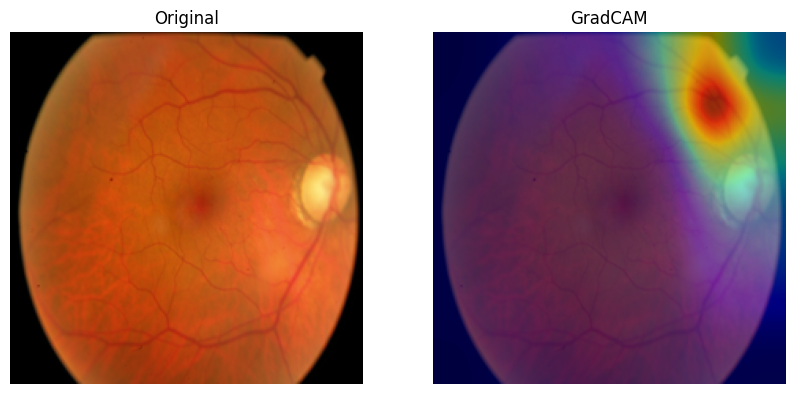

In [98]:
!python src/visualize_gradcam.py \
  --model_name efficientnet \
  --model_size small \
  --checkpoint_path efficientnet_best_model.pth \
  --image_path data/fundus_photos/img16030.jpg \
  --target_layer features.8.0 \
  --output_path gradcam_visualization_effnet.png

# Display the GradCAM visualization
from IPython.display import Image, display
import os

# Check if the file exists
output_path = "gradcam_visualization_effnet.png"
if os.path.exists(output_path):
    display(Image(filename=output_path))
else:
    print(f"File {output_path} not found. Make sure the GradCAM visualization was generated successfully.")



In [67]:
from src.models import create_model
import torch
# Load model
model = create_model('efficientnet', 'small', pretrained=False)
model.load_state_dict(torch.load('efficientnet_best_model.pth'))
# Print all Conv2d layers
for name, module in model.model.named_modules():
    if isinstance(module, torch.nn.Conv2d):
        print(name)

features.0.0
features.1.0.block.0.0
features.1.0.block.1.fc1
features.1.0.block.1.fc2
features.1.0.block.2.0
features.2.0.block.0.0
features.2.0.block.1.0
features.2.0.block.2.fc1
features.2.0.block.2.fc2
features.2.0.block.3.0
features.2.1.block.0.0
features.2.1.block.1.0
features.2.1.block.2.fc1
features.2.1.block.2.fc2
features.2.1.block.3.0
features.3.0.block.0.0
features.3.0.block.1.0
features.3.0.block.2.fc1
features.3.0.block.2.fc2
features.3.0.block.3.0
features.3.1.block.0.0
features.3.1.block.1.0
features.3.1.block.2.fc1
features.3.1.block.2.fc2
features.3.1.block.3.0
features.4.0.block.0.0
features.4.0.block.1.0
features.4.0.block.2.fc1
features.4.0.block.2.fc2
features.4.0.block.3.0
features.4.1.block.0.0
features.4.1.block.1.0
features.4.1.block.2.fc1
features.4.1.block.2.fc2
features.4.1.block.3.0
features.4.2.block.0.0
features.4.2.block.1.0
features.4.2.block.2.fc1
features.4.2.block.2.fc2
features.4.2.block.3.0
features.5.0.block.0.0
features.5.0.block.1.0
features.5.0